In [1]:
# Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('Control-2.csv', sep=',')

In [4]:
df

,Wind_direction,Pressure,Humidity,Temperature
0,90.9,880.7,98.8,2.9
1,91.1,880.6,99.1,2.9
2,93.9,880.5,99.3,2.9
3,88.8,880.5,99.3,3.0
4,88.6,880.4,99.3,3.1
...,...,...,...,...
2180,303.4,912.8,14.7,10.2
2181,299.4,913.0,14.8,10.0
2182,298.5,912.2,14.0,10.6
2183,300.5,912.1,13.3,10.7


In [5]:
df.dtypes

Wind_direction    float64
Pressure          float64
Humidity          float64
Temperature       float64
dtype: object

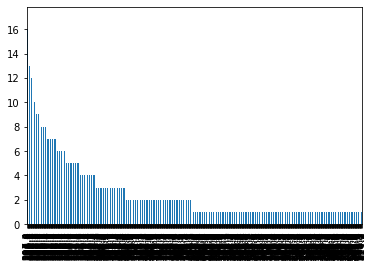

In [6]:
distribution = df['Wind_direction'].value_counts()
distribution.plot(kind='bar')

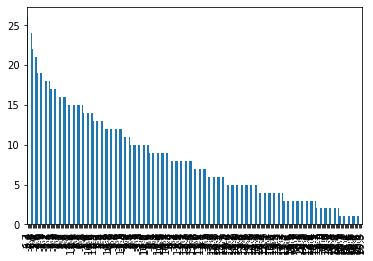

In [7]:
distribution = df['Temperature'].value_counts()
distribution.plot(kind='bar')

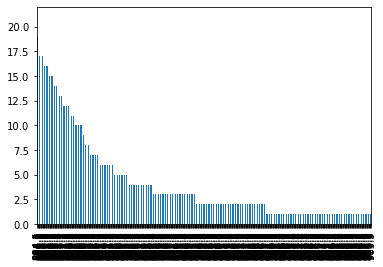

In [8]:
distribution = df['Pressure'].value_counts()
distribution.plot(kind='bar')

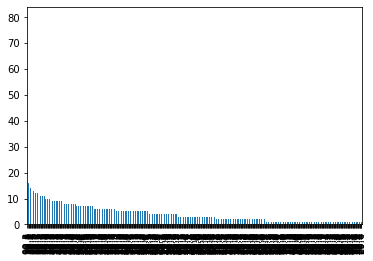

In [9]:
distribution = df['Humidity'].value_counts()
distribution.plot(kind='bar')

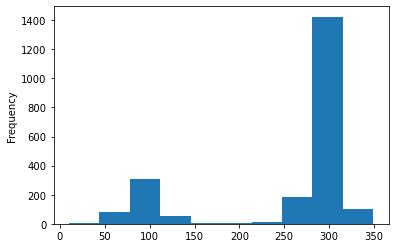

In [10]:
# Price distribution
df['Wind_direction'].plot(kind = 'hist')

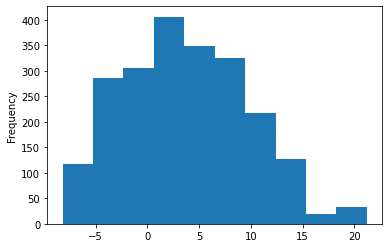

In [11]:
# M2 distribution 
df['Temperature'].plot(kind = 'hist')

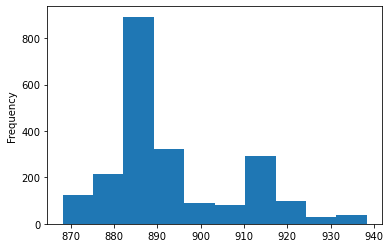

In [12]:
# Price distribution
df['Pressure'].plot(kind = 'hist')

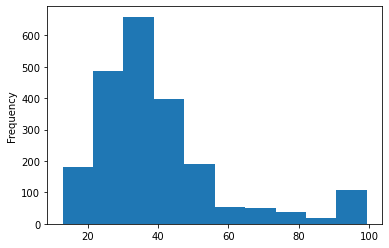

In [13]:
df['Humidity'].plot(kind = 'hist')

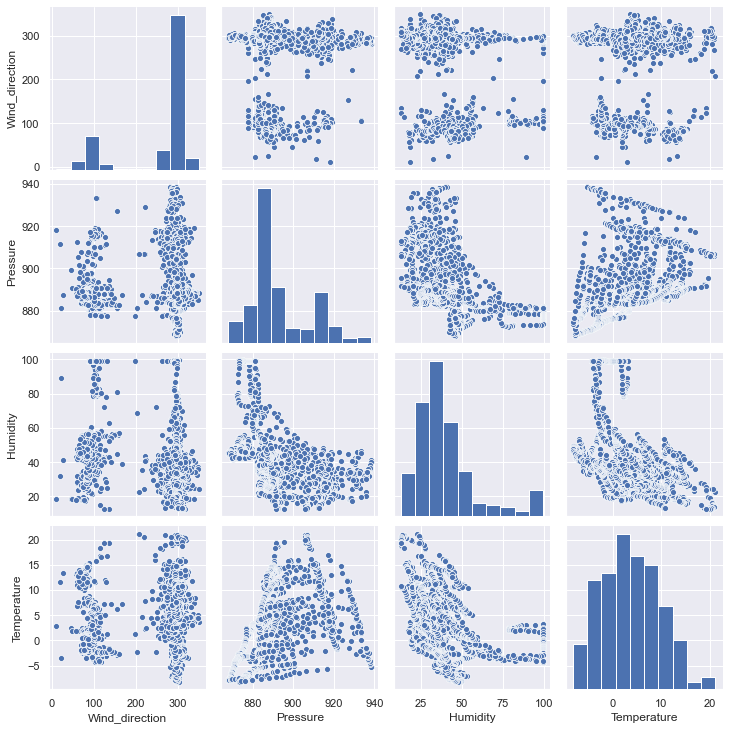

In [14]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, height = 2.5)
plt.show();

In [15]:
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,2185.000000,2185.000000,2185.000000,2185.000000
mean,252.943753,893.269428,40.120595,3.706545
std,83.667598,14.795880,18.856705,5.968682
min,10.100000,868.100000,12.800000,-8.200000
25%,271.300000,884.200000,28.000000,-1.300000
50%,293.300000,888.000000,35.700000,3.300000
75%,300.100000,902.300000,44.800000,7.600000
max,349.100000,938.400000,99.400000,21.200000


In [16]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [17]:
# Outliers
df = outliers(df)
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,2185.000000,2185.000000,2185.000000,2185.000000
mean,252.943753,893.268369,40.002229,3.706545
std,83.667598,14.792679,18.489305,5.968682
min,10.100000,868.100000,12.800000,-8.200000
25%,271.300000,884.200000,28.000000,-1.300000
50%,293.300000,888.000000,35.700000,3.300000
75%,300.100000,902.300000,44.800000,7.600000
max,349.100000,937.657067,96.690709,21.200000


In [18]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Temperature,0,0.0
Humidity,0,0.0
Pressure,0,0.0
Wind_direction,0,0.0


In [19]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [20]:
# Encoding categorical data
df = encoding_char(df)

In [21]:
df

,Wind_direction,Pressure,Humidity,Temperature
0,90.9,880.7,96.690709,2.9
1,91.1,880.6,96.690709,2.9
2,93.9,880.5,96.690709,2.9
3,88.8,880.5,96.690709,3.0
4,88.6,880.4,96.690709,3.1
...,...,...,...,...
2180,303.4,912.8,14.700000,10.2
2181,299.4,913.0,14.800000,10.0
2182,298.5,912.2,14.000000,10.6
2183,300.5,912.1,13.300000,10.7


In [22]:
# Descriptive Statistics
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,2185.000000,2185.000000,2185.000000,2185.000000
mean,252.943753,893.268369,40.002229,3.706545
std,83.667598,14.792679,18.489305,5.968682
min,10.100000,868.100000,12.800000,-8.200000
25%,271.300000,884.200000,28.000000,-1.300000
50%,293.300000,888.000000,35.700000,3.300000
75%,300.100000,902.300000,44.800000,7.600000
max,349.100000,937.657067,96.690709,21.200000


In [23]:
# Linear Regression

In [24]:
df

,Wind_direction,Pressure,Humidity,Temperature
0,90.9,880.7,96.690709,2.9
1,91.1,880.6,96.690709,2.9
2,93.9,880.5,96.690709,2.9
3,88.8,880.5,96.690709,3.0
4,88.6,880.4,96.690709,3.1
...,...,...,...,...
2180,303.4,912.8,14.700000,10.2
2181,299.4,913.0,14.800000,10.0
2182,298.5,912.2,14.000000,10.6
2183,300.5,912.1,13.300000,10.7


In [25]:
# Cheking correlations: на значение температуры больше всего влияет переменная Humidity, меньше всего - Wind_direction
df.corr()

,Wind_direction,Pressure,Humidity,Temperature
Wind_direction,1.000000,0.108521,-0.255345,0.036124
Pressure,0.108521,1.000000,-0.502007,0.405569
Humidity,-0.255345,-0.502007,1.000000,-0.438171
Temperature,0.036124,0.405569,-0.438171,1.000000


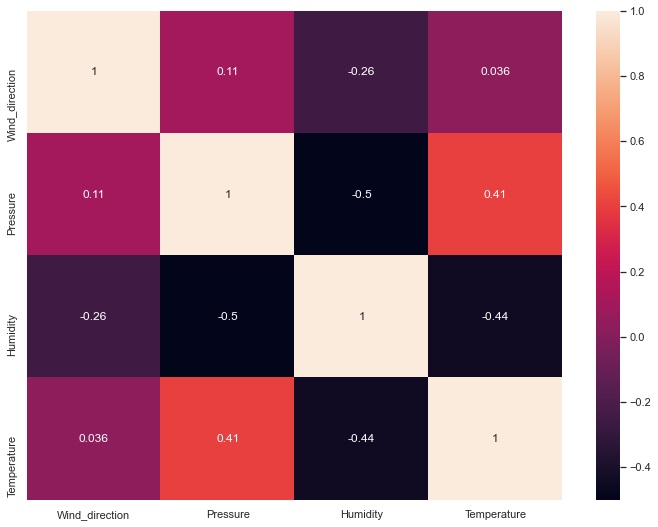

In [26]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [27]:
# Splitting the dataset into the Training set and Test set: деление выборки на тестовую и обучающую.
X = df.iloc[:, :-1].values
y = df.iloc[:, 2].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [28]:
# Fitting Simple Linear Regression to the Training set. Построение простой линейной регрессии где Temperature заваисит от Humidity
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 2:3], y_train)

In [29]:
# Getting parameters коэффициенты регрессии
sr.coef_, sr.intercept_

(array([1.]), -1.4210854715202004e-14)

In [30]:
# Predicting the Test set results на тестовом множестве столбца Humidity
y_pred = sr.predict(X_test[:, 2:3])

In [31]:
# Coefficient of determination R^2 узнаем коэф. детерминации на обучающей и на тестовой выборке (R^ равен 1. Модель очень хорошая)
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:, 2:3], y_test)

(1.0, 1.0)

In [32]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(8.162273384547659e-29, 8.669166158428803e-29)

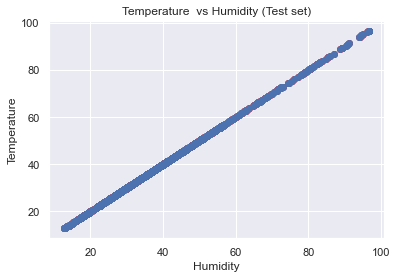

In [33]:
# Visualising the train set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sr.predict(X_train[:, 2:3]), 'bo')
plt.title('Temperature  vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [34]:
# Fitting Optimized Multiple Regression to the Training set
mr = LinearRegression().fit(X_train, y_train)

In [35]:
# Getting parameters
mr.coef_, mr.intercept_

(array([ 8.10951205e-18, -1.11022302e-16,  1.00000000e+00]),
 7.105427357601002e-14)

In [36]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [37]:
# Coefficient of determination R^2 (Показания не изменились)
mr.score(X_train, y_train), mr.score(X_test, y_test)

(1.0, 1.0)

In [38]:
# Mean squared error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(1.2823845627084106e-27, 1.3055449412301168e-27)

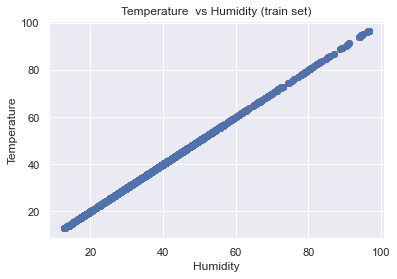

In [39]:
# Visualising the train set results (красные значения находятся полностью под синими, т.к. R^2=1)
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], mr.predict(X_train), 'bo')
plt.title('Temperature  vs Humidity (train set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

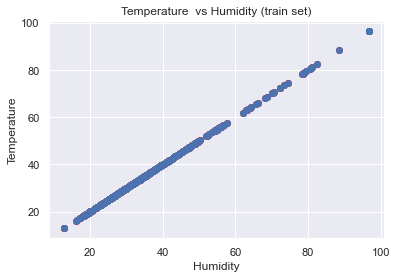

In [40]:
# Visualising the Test set results (красные значения находятся полностью под синими, т.к. R^2=1)
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Temperature  vs Humidity (train set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [41]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [42]:
# Getting parameters
pr.coef_, pr.intercept_

(array([1., 0.]), -6.394884621840902e-14)

In [43]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [44]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(1.0, 1.0)

In [45]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(1.5692483251122583e-27, 1.5707466192800694e-27)

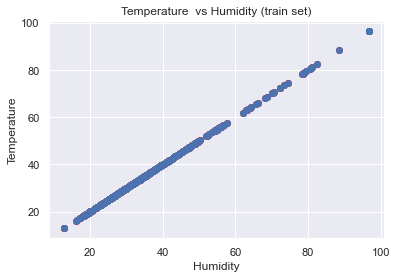

In [46]:
# Visualising the Train set results (красные значения находятся полностью под синими, т.к. R^2=1)
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Temperature  vs Humidity (train set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

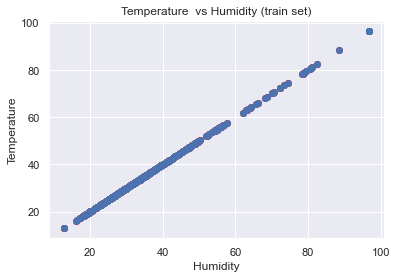

In [47]:
# Visualising the Test set results (красные значения находятся полностью под синими, т.к. R^2=1)
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Temperature  vs Humidity (train set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [48]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [49]:
# Regression Neural Network

In [50]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [53]:
! pip install keras
! pip install tensorflow

In [54]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [55]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(units = 4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [56]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
175/175 [==============================] - 0s 499us/step - loss: 0.6405 - accuracy: 0.0000e+00
Epoch 2/100
175/175 [==============================] - 0s 509us/step - loss: 0.2526 - accuracy: 0.0000e+00
Epoch 3/100
175/175 [==============================] - 0s 503us/step - loss: 0.1116 - accuracy: 0.0000e+00
Epoch 4/100
175/175 [==============================] - 0s 572us/step - loss: 0.0673 - accuracy: 0.0000e+00
Epoch 5/100
175/175 [==============================] - 0s 555us/step - loss: 0.0458 - accuracy: 0.0000e+00
Epoch 6/100
175/175 [==============================] - 0s 572us/step - loss: 0.0335 - accuracy: 0.0000e+00
Epoch 7/100
175/175 [==============================] - 0s 551us/step - loss: 0.0254 - accuracy: 0.0000e+00
Epoch 8/100
175/175 [==============================] - 0s 526us/step - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 9/100
175/175 [==============================] - 0s 514us/step - loss: 0.0163 - accuracy: 0.0000e+00
Epoch 10/100
175/175 [===============

175/175 [==============================] - 0s 937us/step - loss: 1.3761e-04 - accuracy: 0.0000e+00
Epoch 74/100
175/175 [==============================] - 0s 915us/step - loss: 1.2408e-04 - accuracy: 0.0000e+00
Epoch 75/100
175/175 [==============================] - 0s 1ms/step - loss: 7.7096e-05 - accuracy: 0.0000e+00
Epoch 76/100
175/175 [==============================] - 0s 1ms/step - loss: 8.0637e-05 - accuracy: 0.0000e+00
Epoch 77/100
175/175 [==============================] - 0s 2ms/step - loss: 7.8991e-05 - accuracy: 0.0000e+00
Epoch 78/100
175/175 [==============================] - 0s 1ms/step - loss: 9.0745e-05 - accuracy: 0.0000e+00
Epoch 79/100
175/175 [==============================] - 0s 1ms/step - loss: 1.0396e-04 - accuracy: 0.0000e+00
Epoch 80/100
175/175 [==============================] - 0s 1ms/step - loss: 7.8206e-05 - accuracy: 0.0000e+00
Epoch 81/100
175/175 [==============================] - 0s 2ms/step - loss: 7.7755e-05 - accuracy: 0.0000e+00
Epoch 82/100
175/17

In [57]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [58]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [59]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

0.013007810948951665

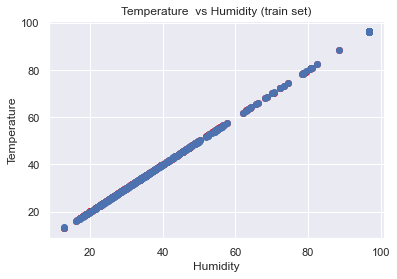

In [60]:
# Visualising the Test set results (красные значения находятся полностью под синими, т.к. R^2=1)
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Temperature  vs Humidity (train set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

In [61]:
#Данная выборка при разделении на Тестовую и тренировочную дает значение R^=1. Это идеальный показатель, но нереальный. 
#Возможно существует ошибка в данных или какие-то другие проблемы с выборкой, т.к. такая ситуация в природе невозможна. 
#(Но всегда существует вариант ошибки в рассчетах)